In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2 as cv  
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('handWritten1.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
----------------
The predicted value is :  5
----------------


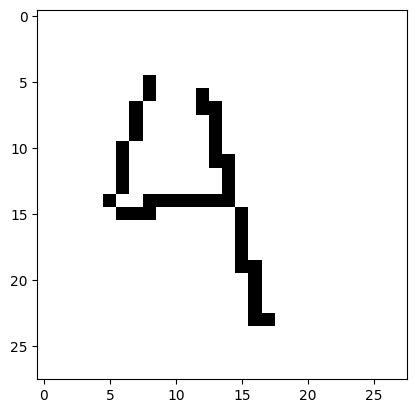

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
----------------
The predicted value is :  3
----------------


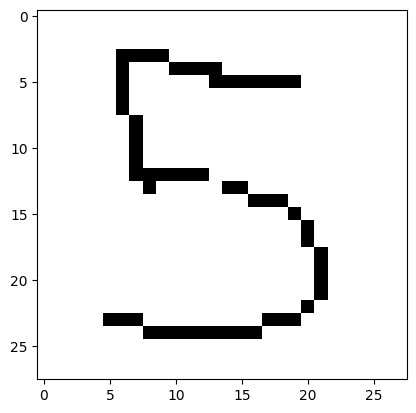

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
----------------
The predicted value is :  5
----------------


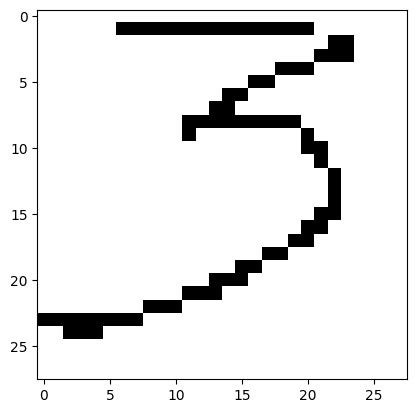

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
----------------
The predicted value is :  1
----------------


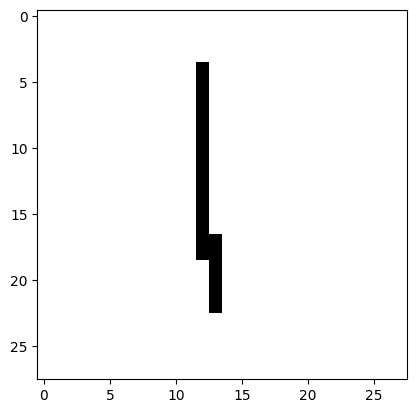

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
----------------
The predicted value is :  2
----------------


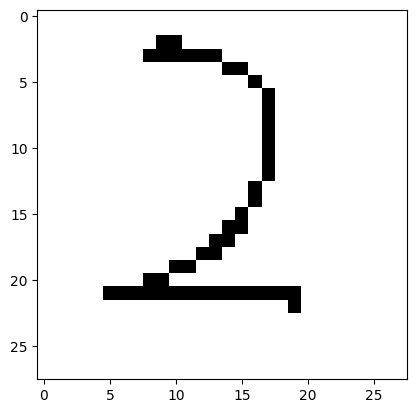

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
----------------
The predicted value is :  3
----------------


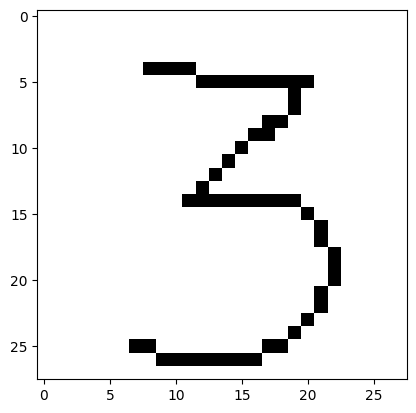

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
----------------
The predicted value is :  4
----------------


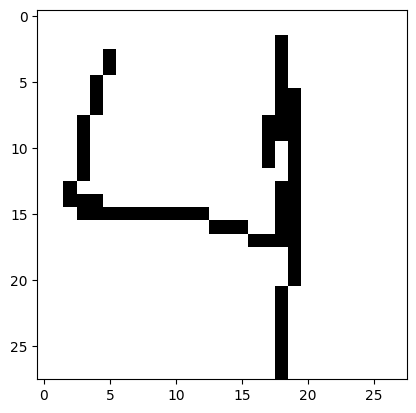

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
----------------
The predicted value is :  7
----------------


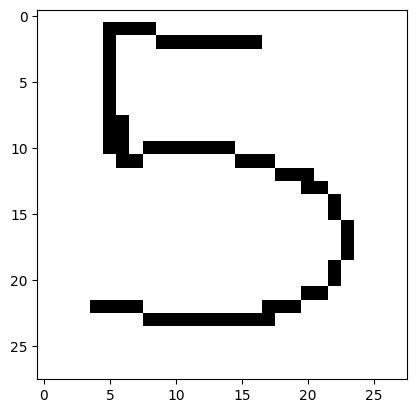

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
----------------
The predicted value is :  7
----------------


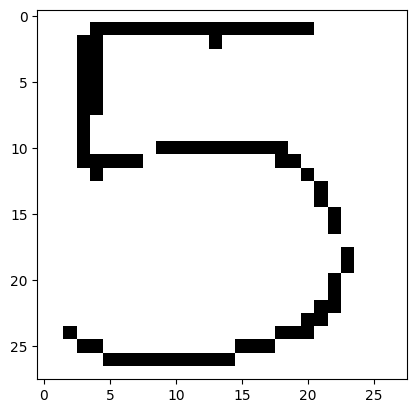

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
----------------
The predicted value is :  8
----------------


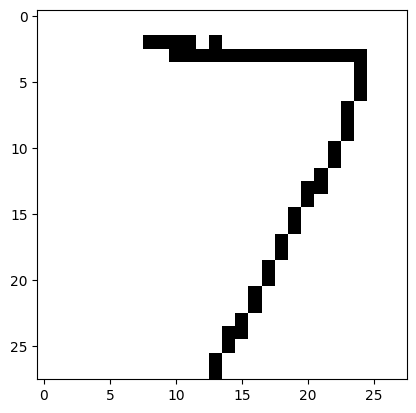

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
----------------
The predicted value is :  8
----------------


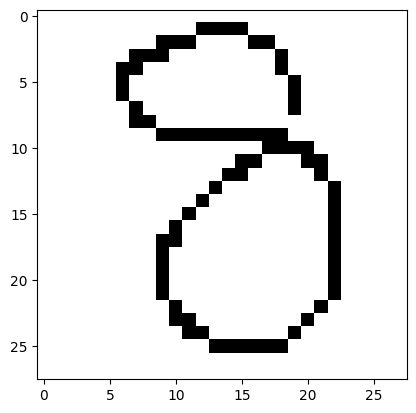

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
----------------
The predicted value is :  3
----------------


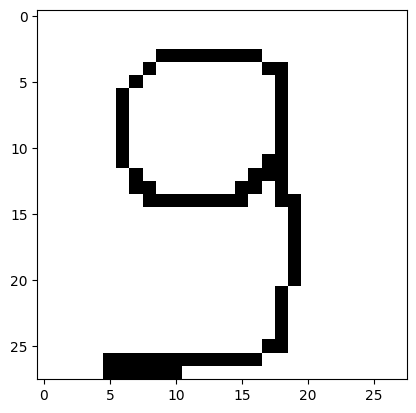

In [3]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageGrab
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set up the whiteboard window
window = tk.Tk()
window.title("Whiteboard")

# Create a canvas to draw on
canvas = tk.Canvas(window, width=280, height=280, bg='white')
canvas.pack()

# Set up drawing
draw = ImageDraw.Draw(Image.new("RGB", (280, 280), "white"))
last_x, last_y = None, None

def draw_event(event):
    global last_x, last_y
    x, y = event.x, event.y
    if last_x and last_y:
        canvas.create_line((last_x, last_y, x, y), width=10)
        draw.line((last_x, last_y, x, y), fill='black', width=10)
    last_x, last_y = x, y

def reset_last_point(event):
    global last_x, last_y
    last_x, last_y = None, None

canvas.bind('<B1-Motion>', draw_event)
canvas.bind('<ButtonRelease-1>', reset_last_point)

def predict_image():
    # Get the coordinates of the canvas
    x0 = window.winfo_rootx() + canvas.winfo_x()
    y0 = window.winfo_rooty() + canvas.winfo_y()
    x1 = x0 + canvas.winfo_width()
    y1 = y0 + canvas.winfo_height()
    
    # Capture the canvas content
    img = ImageGrab.grab().crop((x0, y0, x1, y1))


    img = ImageGrab.grab().crop((x0, y0, x1, y1))
    
    # Resize and save the image
    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    img.save('digit_image.png')
    

    img=cv.imread('digit_image.png')[:,:,0]#all of it and 1st and last one
    img=np.invert(np.array([img]))#invert black to white in images so that model wont get confues
    prediction=model.predict(img)
    # Threshold the inverted image
    threshold_value = 128  # You can adjust this threshold value
    img = np.where(img > threshold_value, 255, 0)
    print("----------------")
    print("The predicted value is : ",np.argmax(prediction))
    print("----------------")
    plt.imshow(img[0],cmap=plt.cm.binary)#change the color in black and white
    plt.show()


def clear_canvas():
    canvas.delete("all")  # Clear all drawn lines
    draw.rectangle([0, 0, 280, 280], fill='white')  # Clear the PIL image


# Add a button to predict the drawing
predict_button = tk.Button(window, text="Predict", command=predict_image)
predict_button.pack()

clear_button = tk.Button(window, text="Clear", command=clear_canvas)
clear_button.pack()

window.mainloop()
